In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection

(-3.0, 4.0)

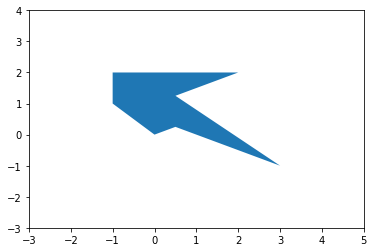

In [2]:
#assume vertices are given in clockwise order
order= 'CW'
vertices = np.array([[0,0],[-1,1], [-1,2], [2, 2], [0.5, 1.25], [3, -1], [0.5, 0.25]])
pgn = Polygon(vertices)
pc = PatchCollection([pgn])
# Create figure and axes
fig, ax = plt.subplots(1)
ax.add_collection(pc)
ax.set_xlim(-3, 5)
ax.set_ylim(-3, 4)

In [65]:
def find_reflex_angles(vertices, order):
    #for each triplet of vertices, see if they form an angle that contradicts
    #the point order (e.g., if it's counterlockwise when order is clockwise)
    n = len(vertices)
    reflex_idx = []
    for i in range(n):
        a = vertices[i]
        b = vertices[(i+1)%n]
        c = vertices[(i+2)%n]
        ccw = is_ccw(a,b,c)
        if (ccw and order == 'CW') or (not ccw and order == 'CCW'):
            reflex_idx.append((i+1)%n)
    
    return reflex_idx
        
def is_ccw(a,b,c):
    return (b[0] - a[0])*(c[1] - b[1]) - (c[0] - b[0])*(b[1] - a[1]) > 0

def is_convex(vertices, order = 'CW'):
    return len(find_reflex_angles(vertices, order)) == 0
    
def segments_intersect(a1, b1, a2, b2):
    return is_ccw(a1, b1, a2) != is_ccw(a1, b1, b2) and is_ccw(a2, b2, a1) != is_ccw(a2, b2, b1)

def build_XSI(vertices, order):
    #paper says this can be done in O(n^2logn) time, but I'm not sure
    #what that algorithm would look like
    n = len(vertices)
    
    XSI = np.ones((n,n))
    #check all cords to see which intersect
    for i in range(n):
        #since i+1 is just an edge, which we know is OK
        for j in range(i+2, n):
            for l in range(n):
                k = (l+1)%n
                if i!=l and i!=k and j!=l and j!=k and segments_intersect(vertices[i], vertices[j], vertices[l], vertices[k]):
                    XSI[i,j] = 0
                    XSI[j,i] = 0
                    XSI[l,k] = 0
                    XSI[k,l] = 0
    
    #now check to make sure the chord candidates which don't intersect other candidates
    # is inside the polygon
    for i in range(n):
        #since i+1 is just an edge, which we know is OK
        for j in range(i+2, n):
            if XSI[i,j]:
                mid_point = (vertices[i] + vertices[j])/2
                if not point_in_poly(vertices, mid_point):
                    XSI[i,j] = 0
                    XSI[j,i] = 0
    return XSI

def point_in_poly(vertices, pt):
    n = len(vertices)
    n_inter = 0
    
    end_pt = np.max(vertices,axis=0)+1#just put another point way out there

    #check how many edges we intersect
    for i in range(n):
        a1 = vertices[i]
        b1 = vertices[(i+1)%n]
        n_inter += segments_intersect(a1, b1, pt, end_pt)

    #odd number of intersections indicates point was in interior
    return n_inter%2 == 1


def plot_XSI(XSI, vertices):
    n = len(vertices)
    for i in range(n):
        for j in range(i+1, n):
            if XSI[i,j]:
                idx = [i,j]
                plt.plot(vertices[idx,0], vertices[idx,1])
                
def is_cyclic(a_ids, b_ids, n):
    #Must be cyclic in Clockwise direction? Unclear from paper.
    #For now, assume that's the case
    #Reset indices so that i is at 0
    i,j = (a_ids - a_ids[0])%n
    k,l = (b_ids - a_ids[0])%n
    #it's ok for l to be at 0
    if l==0:
        l = n
    return  (k>=j and l>k)
                

In [40]:
find_reflex_angles(vertices, order)

[4, 6]

In [41]:
is_convex(vertices, order)

False

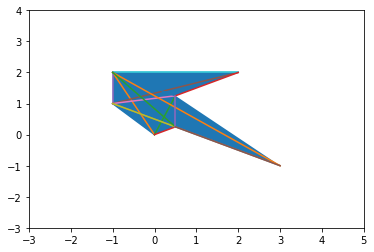

In [44]:
XSI = build_XSI(vertices, order)
pgn = Polygon(vertices)
pc = PatchCollection([pgn])
# Create figure and axes
fig, ax = plt.subplots(1)
ax.add_collection(pc)
ax.set_xlim(-3, 5)
ax.set_ylim(-3, 4)
plot_XSI(XSI, vertices)

In [8]:
def cnvx_skull(vertices, order):
    n =len(vertices)
    #calculate extremal chords
    XSI = build_XSI(vertices, order)
    chord_idxs = np.asarray(np.where(XSI==1)).T
    n_chords = len(chord_idxs)
    A = -1*np.Inf*np.ones((n_chords, n_chords))
    #calculate area of chord set
    for i in range(n_chords):
        for j in range(n_chords):
            if chain_is_admissible(vertices, chord_idxs[i], chord_idxs[j], n):
            
#

    
def chain_is_admissible(vertices, idcs1, idcs2):
        if not is_cyclic(idcs1, idcs2):
            return False
        
        #now check that first node in balanced chain is in idcs1 segment
        #and that last node in balanced chain is in idcs2 segment
        
        #calc balanced (L0, L1, R(C1, C2)) chain

In [58]:
chord_idxs = np.asarray(np.where(XSI==1)).T

In [74]:
is_cyclic(np.array([2,1]), np.array([1,2]), 4)

True